In [21]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv('Weekly.csv') 
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
X = data[["Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]]
Y = data[["Direction"]]

In [4]:
Y.head()

,Direction
0,Down
1,Down
2,Up
3,Up
4,Up


In [6]:
y = label_binarize(Y, classes=['Up','Down'])
n_classes = y.shape[1]
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [7]:
n_classes

1

In [8]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, Y)

/Users/amandasayuri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/amandasayuri/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predictions = logisticRegr.predict(X)
print(confusion_matrix(Y, predictions))
print(classification_report(Y, predictions))

[[ 55 429]
 [ 47 558]]
              precision    recall  f1-score   support

        Down       0.54      0.11      0.19       484
          Up       0.57      0.92      0.70       605

    accuracy                           0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



In [10]:
probs = logisticRegr.predict_proba(X)

In [11]:
probs

array([[0.39193166, 0.60806834],
       [0.39949375, 0.60050625],
       [0.41297468, 0.58702532],
       ...,
       [0.42004624, 0.57995376],
       [0.44885782, 0.55114218],
       [0.47786636, 0.52213364]])

In [12]:
teste = logisticRegr.predict(X)
teste

array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype=object)

In [13]:
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [18]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(i)
    fpr[i], tpr[i], thresholds = roc_curve(y[:, i], probs[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

0


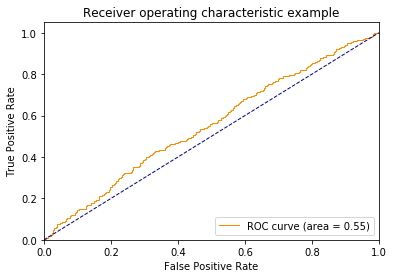

In [19]:
plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
thresholds

array([0.23781013, 0.2715873 , 0.28410495, ..., 0.65470823, 0.68870629,
       0.71325524])

# Precision - Recall Curve

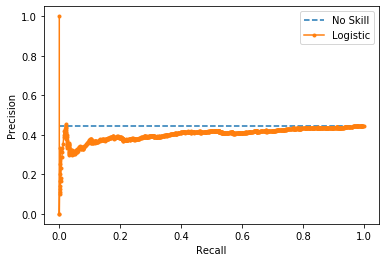

In [33]:
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y[:, i], probs[:, 1])
#lr_f1, lr_auc = f1_score(y, predictions), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y[y==1]) / len(y)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/